In [168]:
import pandas as pd
import numpy as np

In [169]:
# Importing dataset to be processed with pandas & displaying the top 10 result
dt = pd.read_csv('assignment1_dataset.csv', sep=',')
dt.head(10)

,f1,f2,f3,f4,f5,response
0,-0.764216,-1.016209,0.149410,-0.050119,-0.578127,6.242514
1,0.763880,-1.159509,-0.721492,-0.654067,-0.431670,-8.118241
2,0.519329,-0.664621,-1.694904,1.339779,0.182764,66.722455
3,-0.177388,0.515623,0.135144,-0.647634,-0.405631,-27.716793
4,0.104022,0.749665,-0.939338,-0.090725,-0.639963,8.192075
5,-0.699867,0.019159,1.103377,-0.671614,-0.119063,-18.597563
6,-1.028250,0.962967,0.471027,-1.941219,-0.465591,-73.174734
7,0.337585,1.352948,-1.789795,-0.885796,-0.846150,-25.865464
8,0.295433,-0.907789,0.275980,-0.675526,-0.942592,-9.001596
9,0.442269,-0.704559,-1.127342,1.030206,0.800113,57.076963


In [170]:
# Displaying additional description
dt.describe()

,f1,f2,f3,f4,f5,response
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.012255,-0.043030,-0.065785,0.039616,0.008074,11.229435
std,0.998816,1.042413,0.982640,1.023960,1.006679,40.028188
min,-3.174809,-3.381691,-3.158010,-2.764936,-2.946633,-103.044475
25%,-0.655282,-0.759477,-0.734505,-0.660802,-0.685371,-16.580272
50%,-0.001177,-0.038444,-0.049838,-0.006831,-0.000368,10.554227
75%,0.697331,0.696343,0.591642,0.737806,0.710398,38.485118
max,3.092866,3.534175,3.406115,3.145835,3.007734,157.890314


In [171]:
# Make a correlation matrix between the columns/features and target in ascending order
corr_matrix = dt.corr()
corr_matrix['response'].sort_values(ascending=True)
# Correlation between f4 and response are the closest

f2         -0.031751
f5         -0.028999
f3          0.015218
f1          0.308474
f4          0.947255
response    1.000000
Name: response, dtype: float64

Text(0.5, 1.0, 'relationship between f4 & response')

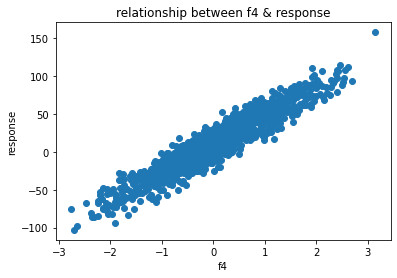

In [172]:
# let's plot f4 & response, because f4 corr value is close to 1
from matplotlib import pyplot as plt
plt.scatter(dt.f4, dt.response)
plt.xlabel('f4')
plt.ylabel('response')
plt.title('relationship between f4 & response')

Text(0.5, 1.0, 'relationship between f1 & response')

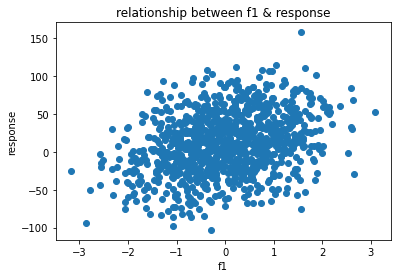

In [173]:
# let's also plot f1 & response, because f1 corr value is the second closest to 1
from matplotlib import pyplot as plt
plt.scatter(dt.f1, dt.response)
plt.xlabel('f1')
plt.ylabel('response')
plt.title('relationship between f1 & response')

In [174]:
# our group has decided to compare the linear regression between f1 & f4 and shows the difference
# Splitting the training and test set with the ratio of 8:2 for f4
from sklearn.model_selection import train_test_split
X_f4 = np.array(dt.iloc[:, 3])
y_f4 = np.array(dt.iloc[:, -1])
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_f4, y_f4, random_state=42, train_size=0.8)

In [175]:
# Splitting the training and test set with the ratio of 8:2 for f1
X_f1 = np.array(dt.iloc[:, 0])
y_f1 = np.array(dt.iloc[:, -1])
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_f1, y_f1, random_state=42, train_size=0.8)

In [176]:
alpha = 0.15 # Set learning rate to 0.15
max_epoch = 2000 # Set max iteration to 2000

In [177]:
# the loss function accept y as y dataset and yhat as the predicted y value
def loss_fn(y, yhat):
    # loss = the sum of (y-yhat)^2/len(y)
    # len(y) returns the number of elements in y
    loss = np.sum((y-yhat)**2)/len(y)
    return loss

In [178]:
# train model accepts X as X dataset, y as y dataset, alpha as learning rate, max_epoch as max number of iterations
def train_model(X, y, alpha, max_epoch):
    # we initialize weight and bias as both 0
    # assign len(X) to n
    # creating an empty array to store losses and weights value to be displayed after each iteration later
    w = b = 0
    n = len(X)
    losses = []
    weights = []

    # the prediction function accepts w as weight, and X as the X dataset
    def prediction(w, X):
        # yhat returns the predicted y value by using the general gradient formula
        # y = mx + c
        # but in this case m = w and b = c
        yhat = (w * X) + b
        return yhat;

    # for loop will keep looping until max_epoch is reached
    for i in range(max_epoch):
        # assign prediction function to y_predict and loss_fn to loss
        y_predict = prediction(w, X)
        loss = loss_fn(y, y_predict)

        # losses will append loss after each iteration
        # weights will append w after each iteration
        losses.append(loss)
        weights.append(w)

        # calling loss_fn to calculate the next loss value using y & y_predict
        loss_fn(y, y_predict)

        # calculate the derivatives of both w & b in wd & bd
        wd = -(2/n)*sum(X*(y-y_predict))
        bd = -(2/n)*sum(y-y_predict)

        # w & b will update its own value using wb, bd and alpha
        w = w - alpha * wd
        b = b - alpha * bd

        # will print the i number of iteration, loss, weight, and bias for that iteration
        print(f"Iteration {i+1}: Loss {loss}, Weight {w}, Bias {b}");
    # creating a plot to display the decreasing loss and increasing weight after each iteration
    plt.figure(figsize=(8,6))
    plt.plot(weights, losses)
    plt.scatter(weights, losses, marker='o', color='red')
    plt.title("Loss vs Weights")
    plt.ylabel("Loss")
    plt.xlabel("Weight")
    plt.show()

    # the function will return the estimated weight and bias
    return w, b

Iteration 1: Loss 1721.3069867699319, Weight 11.696102077957205, Bias 3.669599330511377
Iteration 2: Loss 880.8238696125039, Weight 19.679364962567043, Bias 5.987867267407561
Iteration 3: Loss 494.1386394965996, Weight 25.13239378048727, Bias 7.43970719426145
Iteration 4: Loss 315.8860583169484, Weight 28.859946351231205, Bias 8.339228056640865
Iteration 5: Loss 233.539957145164, Weight 31.40999672721068, Bias 8.889073633543482
Iteration 6: Loss 195.4104133768699, Weight 33.15591093800564, Bias 9.219360663173202
Iteration 7: Loss 177.7102979496032, Weight 34.35225495610511, Bias 9.413175880970186
Iteration 8: Loss 169.47134217695225, Weight 35.17271580655756, Bias 9.523228916134661
Iteration 9: Loss 165.62511199497047, Weight 35.73588308015578, Bias 9.582697304873543
Iteration 10: Loss 163.82396516109745, Weight 36.12278728137225, Bias 9.612265933605121
Iteration 11: Loss 162.97772420092355, Weight 36.38883785102429, Bias 9.624679096118454
Iteration 12: Loss 162.57874964772344, Weight 

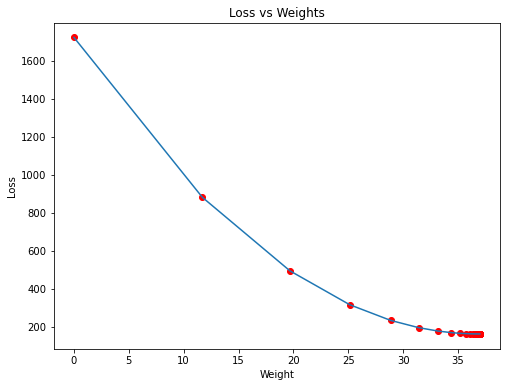

Estimated Weight: 36.98038182456282
Estimated Bias: 9.592430178520882


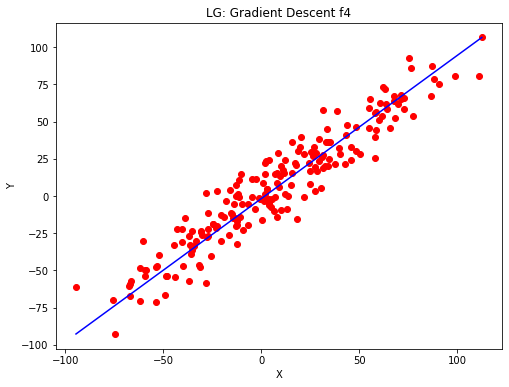

In [179]:
# we'll input the training dataset from f4 to train_model
# and have est_weight & est_bias as the final estimated value
est_weight, est_bias = train_model(X_train4, y_train4, alpha, max_epoch)
print(f"Estimated Weight: {est_weight}\nEstimated Bias: {est_bias}")

# y_pred4 is the predicted y value using both estimated weight & bias and the X test dataset
y_pred4 = (est_weight*X_test4) + est_bias
plt.figure(figsize = (8,6))

# scatter the y test & y pred value and plot them
plt.scatter(y_test4, y_pred4, marker='o', color='red')
plt.plot([min(y_test4), max(y_test4)], [min(y_pred4), max(y_pred4)], color='blue', label="line1")

plt.title("LG: Gradient Descent f4")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [180]:
# this is to measure the error using mean absolute error, mean squared error, and r2 score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test4, y_pred4))
print(mean_squared_error(y_test4, y_pred4))
print(r2_score(y_test4, y_pred4))

10.593441909037288
173.2860954934168
0.8978521452417096


Iteration 1: Loss 1721.3069867699319, Weight 3.689212084502532, Bias 3.669599330511377
Iteration 2: Loss 1567.7214115819804, Weight 6.285064632618403, Bias 6.237393813416817
Iteration 3: Loss 1492.0972346050717, Weight 8.111596555002121, Bias 8.034199056536591
Iteration 4: Loss 1454.8594169289017, Weight 9.396810295080039, Bias 9.29150473447451
Iteration 5: Loss 1436.522719225072, Weight 10.301134790810663, Bias 10.17129644916792
Iteration 6: Loss 1427.4930593949791, Weight 10.93745258429452, Bias 10.786923895350755
Iteration 7: Loss 1423.046388073608, Weight 11.385191325817603, Bias 11.217703554696506
Iteration 8: Loss 1420.8565497132304, Weight 11.70023887866654, Bias 11.519137048355717
Iteration 9: Loss 1419.77809356029, Weight 11.921919827995715, Bias 11.730061497577417
Iteration 10: Loss 1419.246956821867, Weight 12.077904332033048, Bias 11.877653026825135
Iteration 11: Loss 1418.9853653264365, Weight 12.187662123075512, Bias 11.98092798509225
Iteration 12: Loss 1418.8565242518182

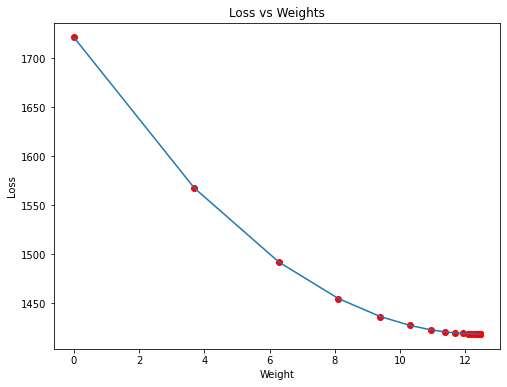

Estimated Weight: 12.448269594873276
Estimated Bias: 12.221593331270578


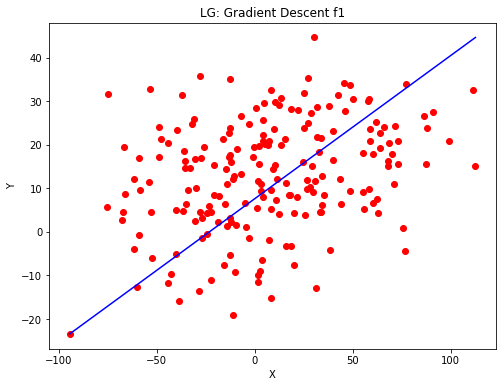

In [181]:
# we'll input the training dataset from f1 to train_model
# and have est_weight & est_bias as the final estimated value
est_weight1, est_bias1 = train_model(X_train1, y_train1, alpha, max_epoch)
print(f"Estimated Weight: {est_weight1}\nEstimated Bias: {est_bias1}")

# y_pred1 is the predicted y value using both estimated weight & bias and the X test dataset
y_pred1 = (est_weight1*X_test1) + est_bias1
plt.figure(figsize = (8,6))

# scatter the y test & y pred value and plot them
plt.scatter(y_test1, y_pred1, marker='o', color='red')
plt.plot([min(y_test1), max(y_test1)], [min(y_pred1), max(y_pred1)], color='blue', label="line1")

plt.title("LG: Gradient Descent f1")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [182]:
# this is to measure the error using mean absolute error, mean squared error, and r2 score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_absolute_error(y_test1, y_pred1))
print(mean_squared_error(y_test1, y_pred1))
print(r2_score(y_test1, y_pred1))

32.437113026637256
1573.368635769852
0.07253821819781281
